In [6]:
import requests
from datetime import datetime
import time

import json
import pandas as pd
import numpy as np

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [10]:
df_0630 = pd.read_csv("ell0630.csv")

In [37]:
df_0630.describe().T 

,count,mean,std,min,25%,50%,75%,max
amount,5041.0,1164.573456,12654.896765,0.000000,0.00000,0.0,2.326507,500097.964200
risk_score,5041.0,0.149107,0.978229,0.000000,0.00000,0.0,0.005091,10.000000
illicit,5041.0,0.083515,0.276687,0.000000,0.00000,0.0,0.000000,1.000000
Sanctioned,5041.0,0.220591,0.414686,0.000000,0.00000,0.0,0.000000,1.000000
major_per,5041.0,1.446094,9.750984,0.000000,0.00000,0.0,0.041472,100.000000
score_change,5041.0,0.001464,0.130527,-4.374542,-0.00003,0.0,0.000000,3.736362
comment,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
analysis_meta,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
illicit_score,5041.0,0.004798,0.183917,0.000000,0.00000,0.0,0.000000,10.000000
Sanctioned_score,5041.0,0.065869,0.603230,0.000000,0.00000,0.0,0.000000,10.000000


In [12]:
df_dimmies = pd.read_csv("df_dimmies.csv")
df_dimmies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26438 entries, 0 to 26437
Data columns (total 87 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hash                     26438 non-null  object 
 1   timestamp                26438 non-null  float64
 2   ownerAddress             26438 non-null  object 
 3   toAddress                26438 non-null  object 
 4   amount                   26438 non-null  float64
 5   vip                      26438 non-null  int64  
 6   fee                      26438 non-null  int64  
 7   net_usage                26438 non-null  int64  
 8   multi_sign_fee           26438 non-null  int64  
 9   net_fee                  26438 non-null  int64  
 10  energy_penalty_total     26438 non-null  int64  
 11  energy_usage             26438 non-null  int64  
 12  energy_fee               26438 non-null  int64  
 13  energy_usage_total       26438 non-null  int64  
 14  memoFee               

In [13]:
df_risk=df_0630[['tx_hash','illicit']]

In [14]:
df_risk = df_risk.rename(columns={'tx_hash': 'hash'})

In [15]:
df_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5041 entries, 0 to 5040
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   hash     5039 non-null   object
 1   illicit  5041 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 78.9+ KB


In [16]:
df_risk_table=pd.merge(df_risk, df_dimmies, on='hash', how='inner')
df_risk_table

,hash,illicit,timestamp,ownerAddress,toAddress,amount,vip,fee,net_usage,multi_sign_fee,...,tokenName_6,tokenName_7,tokenName_8,tokenName_9,tokenName_10,tokenName_11,tokenName_12,tokenLevel_1,tokenLevel_2,tokenLevel_4
0,7515f82ad14751c8c0476c0a8537ed48f153c61021e950...,0,1.685360e+12,TEBd96EzXVsqiQQP1TiQrHCUPvN12JPXic,TWS1onJnNTg8tJHomceqxBxTsUB1DHh7PV,1.0,1,0,265,0,...,0,0,0,0,1,0,0,0,1,0
1,429d07b129c54d3ad9c6ec058a1b1cba43120aa371f7a4...,0,1.685360e+12,TMGRFVDTWrv7RMg1yS7TRRrD1LqHyYc2zN,TNp1vPy3W9PB4Y7kcMBaqG3BM9BtWpZwHh,14672196.0,1,1000000,0,0,...,0,0,0,0,1,0,0,0,1,0
2,c119235e18f8bbc3c8afdf4d6944049ae0dd7458d60270...,0,1.685360e+12,TMjopsnus5UrTPKMW8YTY3qqcX1nE9vADF,TCet5Cfjr2gR6MFBFxW9QA3QBCHHYtsHFL,1.0,1,0,265,0,...,0,0,0,0,1,0,0,0,1,0
3,db4abda03946e808ff1c020f4056732b549b48f8f61985...,0,1.685360e+12,TDi7em7tmj1WtR6SYLCGRPpCrCZxxyx8sk,TRLk6PBEPaB2cVgivMtJ4cwj5KPVH7vw5b,1.0,1,0,257,0,...,0,0,0,0,1,0,0,0,1,0
4,26be24ead3a4dd70ea0d65068de2699d66c601a3684e2d...,0,1.685360e+12,TBwmVsfvBztGmVeUqPH6YJvyGeYFuXfiNP,TWS1onJnNTg8tJHomceqxBxTsUB1DHh7PV,25070000.0,1,0,346,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5034,44bbd22dcdc199e86bd9ed9ba0bc25f48652866238ff8a...,0,1.685360e+12,TFmMtHp3PND4z2jfniCc6KbDQBFdJoMfhK,TRT8WHBKK4t7bVUpXo7AADcBVuGGYfw4hx,25000000.0,1,0,268,0,...,0,0,0,0,1,0,0,0,1,0
5035,5d7ffaf5a44da7bc8101796798e4d0ef1681c1494e278a...,0,1.684850e+12,TGVoDzd2Zvs6d4ekp1tuBbm2xDfxCxCh8B,TGXj7Sm3H34JZAZVtjUdsV6SbTTPg6D784,1.0,1,0,265,0,...,0,0,0,0,1,0,0,0,1,0
5036,5d7ffaf5a44da7bc8101796798e4d0ef1681c1494e278a...,0,1.684850e+12,TGVoDzd2Zvs6d4ekp1tuBbm2xDfxCxCh8B,TGXj7Sm3H34JZAZVtjUdsV6SbTTPg6D784,1.0,1,0,265,0,...,0,0,0,0,1,0,0,0,1,0
5037,874b7c2b31a551349206ab08d04e77e425ab1510e80750...,1,1.684850e+12,TKHncGWStufzRKiQB4VhJnX64Hfr3hxQ9S,TGXj7Sm3H34JZAZVtjUdsV6SbTTPg6D784,3965001.0,1,0,268,0,...,0,0,0,0,1,0,0,0,1,0


In [17]:
df_risk_table_fix= df_risk_table.drop(columns=['hash', 'timestamp','ownerAddress','toAddress'])
df_risk_table_fix

,illicit,amount,vip,fee,net_usage,multi_sign_fee,net_fee,energy_penalty_total,energy_usage,energy_fee,...,tokenName_6,tokenName_7,tokenName_8,tokenName_9,tokenName_10,tokenName_11,tokenName_12,tokenLevel_1,tokenLevel_2,tokenLevel_4
0,0,1.0,1,0,265,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,14672196.0,1,1000000,0,0,100000,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,1.0,1,0,265,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,1.0,1,0,257,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,25070000.0,1,0,346,0,0,17245,0,13395900,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5034,0,25000000.0,1,0,268,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
5035,0,1.0,1,0,265,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
5036,0,1.0,1,0,265,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
5037,1,3965001.0,1,0,268,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [18]:
df_risk_table_fix_x=df_risk_table_fix.drop(columns=['illicit'])
df_risk_table_fix_y=df_risk_table_fix[['illicit']]

In [19]:
df_risk_table_fix_x

,amount,vip,fee,net_usage,multi_sign_fee,net_fee,energy_penalty_total,energy_usage,energy_fee,energy_usage_total,...,tokenName_6,tokenName_7,tokenName_8,tokenName_9,tokenName_10,tokenName_11,tokenName_12,tokenLevel_1,tokenLevel_2,tokenLevel_4
0,1.0,1,0,265,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,14672196.0,1,1000000,0,0,100000,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,1.0,1,0,265,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,1.0,1,0,257,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,25070000.0,1,0,346,0,0,17245,0,13395900,31895,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5034,25000000.0,1,0,268,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
5035,1.0,1,0,265,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
5036,1.0,1,0,265,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
5037,3965001.0,1,0,268,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [20]:
df_risk_table_fix_y

,illicit
0,0
1,0
2,0
3,0
4,0
...,...
5034,0
5035,0
5036,0
5037,1


In [36]:
df_risk_table_fix_y.value_counts()

illicit
0          4618
1           421
dtype: int64

In [21]:
X_train,X_test,y_train,y_test = train_test_split(df_risk_table_fix_x,df_risk_table_fix_y,test_size=0.3,random_state=0)  

In [33]:
X_train.shape, y_train.shape ,X_test.shape, y_test.shape

((3527, 83), (3527, 1), (1512, 83), (1512, 1))

In [25]:
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,y_train)

#use model to make predictions on test data
y_pred = log_regression.predict(X_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix



array([[1386,    0],
       [ 126,    0]], dtype=int64)

In [31]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))



Accuracy: 0.9166666666666666


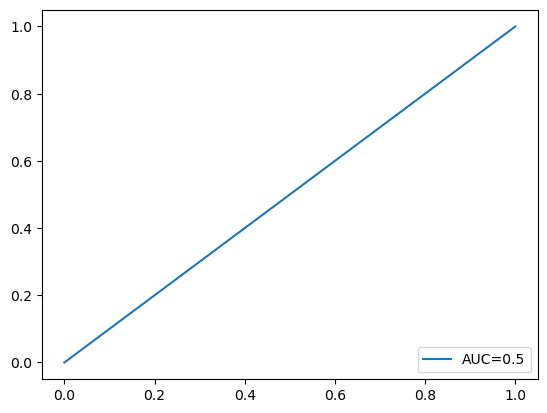

In [32]:
#define metrics
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()